In [62]:
# Setup
import numpy as np 
import pandas as pd 
import os
import pickle
import seaborn as sns
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, confusion_matrix, mean_absolute_error, PrecisionRecallDisplay, precision_recall_curve

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images/model_evaluation_images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(model, fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, model, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

def save_model(model, folder_path="models", file_name="untitled_model.sav"):
    pickle.dump(model, open(os.path.join(folder_path, file_name), 'wb'))

In [63]:
HEARTDISEASE_FULL_PATH = "dataset/afterpreprocessing/full"

x_test = pd.read_csv(os.path.join(HEARTDISEASE_FULL_PATH, f'heartDisease_x_test.csv'))
x_test.head()

,BMI,smoking,alcoholDrinking,stroke,physicalHealth,mentalHealth,diffWalking,sex,ageCategory,race,diabetic,physicalActivity,genHealth,sleepTime,asthma,kidneyDisease,skinCancer
0,2582,1,1,2,10,88,2,1,8,1,3,2,2,7,2,2,2
1,3396,2,1,2,88,88,2,1,9,5,1,1,3,8,2,2,2
2,2767,2,1,2,88,88,1,1,8,1,3,2,2,7,2,2,2
3,2923,2,1,2,88,20,2,2,5,1,3,2,3,4,2,2,2
4,2823,2,1,2,1,1,2,1,10,1,3,1,5,7,2,2,2


In [64]:
y_test = pd.read_csv(os.path.join(HEARTDISEASE_FULL_PATH, f'heartDisease_y_test.csv'))
y_test.head()

,heartDisease
0,2
1,2
2,2
3,2
4,2


In [65]:
HEARTDISEASE_RED_PATH = "dataset/afterpreprocessing/reduced"

red_x_test = pd.read_csv(os.path.join(HEARTDISEASE_RED_PATH, f'heartDisease_red_x_test.csv'))
red_x_test.head()

,BMI,smoking,alcoholDrinking,stroke,physicalHealth,mentalHealth,diffWalking,sex,ageCategory,race,diabetic,physicalActivity
0,2582,1,1,2,10,88,2,1,8,1,3,2
1,3396,2,1,2,88,88,2,1,9,5,1,1
2,2767,2,1,2,88,88,1,1,8,1,3,2
3,2923,2,1,2,88,20,2,2,5,1,3,2
4,2823,2,1,2,1,1,2,1,10,1,3,1


In [66]:
red_y_test = pd.read_csv(os.path.join(HEARTDISEASE_RED_PATH, f'heartDisease_red_y_test.csv'))
red_y_test.head()

,heartDisease
0,2
1,2
2,2
3,2
4,2


In [67]:
# Load models
MODELS_PATH = os.path.join(PROJECT_ROOT_DIR, "models")

DECISION_TREE_PATH = os.path.join(MODELS_PATH, 'decision_tree')
KNN_PATH = os.path.join(MODELS_PATH, 'knn')
LOGREG_PATH = os.path.join(MODELS_PATH, 'log_regression')
KMEANS_PATH = os.path.join(MODELS_PATH, 'kmeans')
RANDOMFOREST_PATH = os.path.join(MODELS_PATH, 'randomforest')
GAUSSIANNB_PATH = os.path.join(MODELS_PATH, 'gaussianNB')

full_decisiontree_model = pickle.load(open(os.path.join(DECISION_TREE_PATH, "full_decision_tree_model.sav"), 'rb'))
reduced_decisiontree_model = pickle.load(open(os.path.join(DECISION_TREE_PATH, "reduced_decision_tree_model.sav"), 'rb'))

full_knn_model = pickle.load(open(os.path.join(KNN_PATH, "full_knn_model.sav"), 'rb'))

full_logregression_model = pickle.load(open(os.path.join(LOGREG_PATH, "full_logregression_model.sav"), 'rb'))

full_gaussianNB_model = pickle.load(open(os.path.join(GAUSSIANNB_PATH, "full_gaussianNB_model.sav"), 'rb'))
reduced_gaussianNB_model = pickle.load(open(os.path.join(GAUSSIANNB_PATH, "reduced_gaussianNB_model.sav"), 'rb'))

reduced_randomforest_model = pickle.load(open(os.path.join(RANDOMFOREST_PATH, "reduced_randomforest_model.sav"), 'rb'))

full_models_names = ["Full Decision Tree", "Full Logistic Regression", "Full KNN", "Reduced Gaussian Naive Bayes"]
reduced_models_names = ["Reduced Decision Tree", "Reduced Gaussian Naive Bayes", "Reduced Random Forest"]
full_models = [full_decisiontree_model, full_logregression_model,full_knn_model, full_gaussianNB_model]
reduced_models = [reduced_decisiontree_model, reduced_gaussianNB_model, reduced_randomforest_model]

### Display Decision Tree Metrics Using Full Feature

Full Decision Tree Metrics:

Number of Positive Predictions (Heart Disease): 976
Number of Negative Predictions (No Heart Disease): 104684
              precision    recall  f1-score   support

           1       0.56      0.06      0.11      9335
           2       0.92      1.00      0.95     96325

    accuracy                           0.91    105660
   macro avg       0.74      0.53      0.53    105660
weighted avg       0.88      0.91      0.88    105660

AUC: 0.816
Mean Absolute Error of the Full Decision Tree Model is 0.08721370433465833
False Positive Rate [0.         0.34861147 0.50190501 0.51531793 0.52550221 0.62385674
 0.63659486 0.71137296 0.7255645  0.79396834 0.85268622 0.85697379
 0.85992214 0.89864521 0.90268362 0.94351414 0.94440696 0.96276148
 0.96509733 0.96578251 0.96947833 0.97402543 0.97431612 0.97532312
 0.98850766 0.99248378 0.99521412 0.99555671 0.99828705 0.99873345
 0.99879574 0.99952245 1.        ] True Postitive Rate [0.         0.03395822 0.08044992 0.08

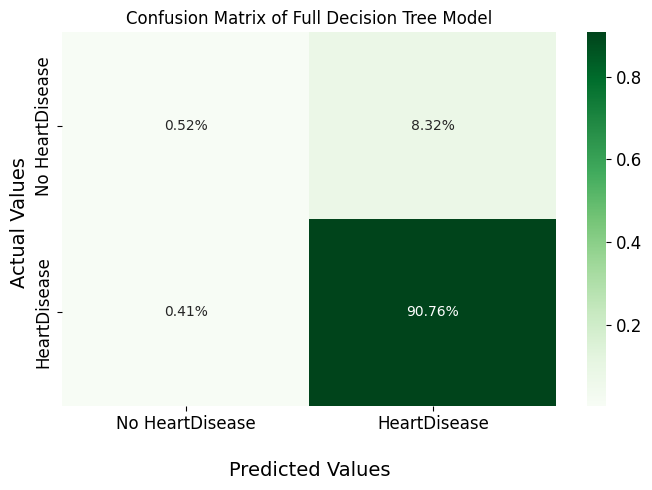

Saving figure ROC_Curve_of_Full_Decision_Tree_Model


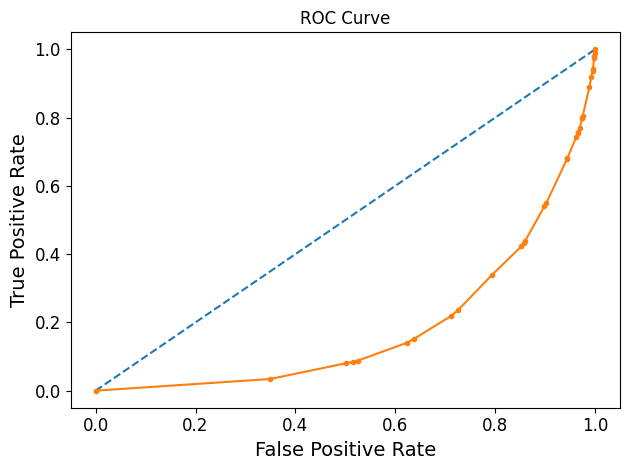

Saving figure Precision_Recall_Curve_of_Full_Decision_Tree_Model


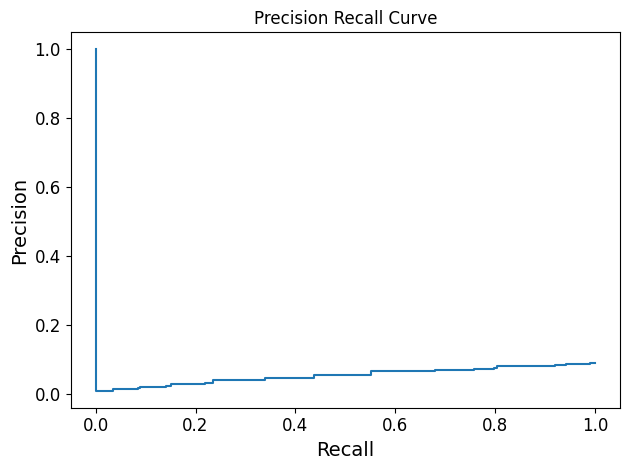

In [68]:
#Predict the response for test dataset
DECISION_TREE_PATH = os.path.join('decision_tree')
def evaluate_FullDecisionTree():
    print("Full Decision Tree Metrics:\n")
    clf = full_decisiontree_model
    y_pred = clf.predict(x_test)
    print(f"Number of Positive Predictions (Heart Disease): {np.sum(y_pred == 1)}\nNumber of Negative Predictions (No Heart Disease): {np.sum(y_pred == 2)}")

    cm = confusion_matrix(y_test, y_pred)

    # evaluate 
    print(classification_report(y_test, y_pred))

    # predict probabilities
    probs = clf.predict_proba(x_test)
    # keep probabilities for the positive outcome only
    probs = probs[:, 1]
    # calculate AUC
    auc = roc_auc_score(y_test, probs)

    print('AUC: %.3f' % auc)

    mae = mean_absolute_error(y_test, y_pred)
    print("Mean Absolute Error of the Full Decision Tree Model is", mae)

    # calculate roc curve
    fpr, tpr, thresholds = roc_curve(y_test, probs,
                                    pos_label=1)

    #print True and False Positive Rates 
    print("False Positive Rate", fpr, "True Postitive Rate", tpr)

    # plot confusion matrix
    plt.figure(figsize=(7,5))
    ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Greens')
    # labels
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    ax.set_title('Confusion Matrix of Full Decision Tree Model')
    ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
    ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
    save_fig(DECISION_TREE_PATH,f"Confusion_Matrix_of_Full_Decision_Tree_Model")
    plt.show()


    # plot ROC Curve
    plt.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    plt.plot(fpr, tpr, marker='.')
    # labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    # show the plot
    save_fig(DECISION_TREE_PATH,f"ROC_Curve_of_Full_Decision_Tree_Model")
    plt.show()

    # Plot Precision Recall Display
    prec, recall, _ = precision_recall_curve(y_test, probs, pos_label=1)
    pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()
    # labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    # show the plot
    save_fig(DECISION_TREE_PATH,f"Precision_Recall_Curve_of_Full_Decision_Tree_Model")
    plt.show()
    return fpr, tpr

fpr, tpr = evaluate_FullDecisionTree()

### Display Logistic Regression Metrics Using Full Feature

Full Logistic Regression Metrics:

Number of Positive Predictions (Heart Disease): 1481
Number of Negative Predictions (No Heart Disease): 104179
              precision    recall  f1-score   support

           1       0.51      0.08      0.14      9335
           2       0.92      0.99      0.95     96325

    accuracy                           0.91    105660
   macro avg       0.71      0.54      0.55    105660
weighted avg       0.88      0.91      0.88    105660

AUC: 0.828
Mean Absolute Error of the Full Logistic Regression Model is 0.08803710013250048
False Positive Rate [0.00000000e+00 1.03815209e-05 2.28393460e-04 ... 9.99979237e-01
 9.99979237e-01 1.00000000e+00] True Postitive Rate [0.         0.         0.         ... 0.99989288 1.         1.        ]
Saving figure Confusion_Matrix_of_Logistic_Regression_Model


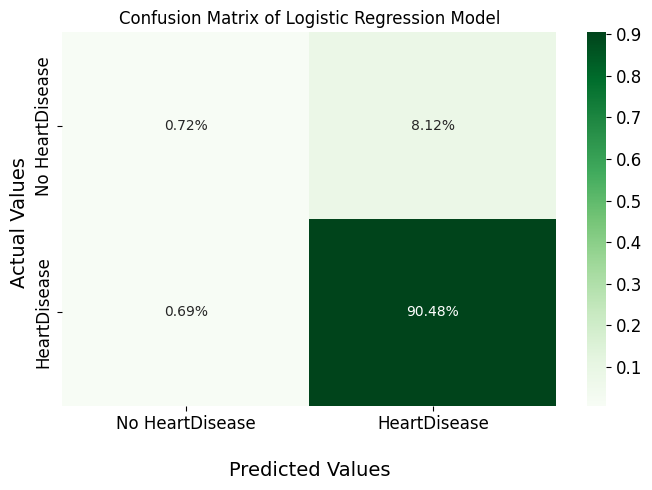

Saving figure ROC_Curve_of_Logistic_Regression_Model


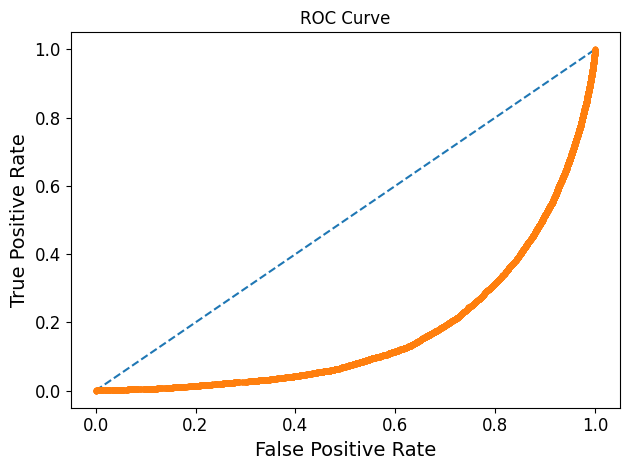

Saving figure Calibration_Curve_of_Logistic_Regression_Model


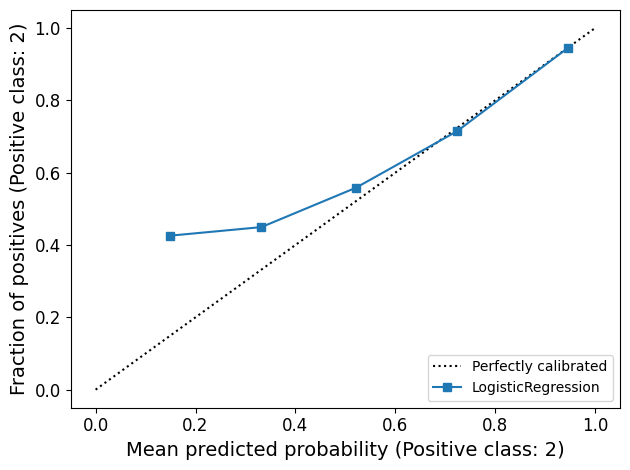

In [69]:
# Evaluate Logistic Regression model 
LOGREG_PATH = os.path.join('log_regression')

def evaluate_LogisticRegression():
    print("Full Logistic Regression Metrics:\n")
    clf = full_logregression_model
    y_pred = clf.predict(x_test)
    print(f"Number of Positive Predictions (Heart Disease): {np.sum(y_pred == 1)}\nNumber of Negative Predictions (No Heart Disease): {np.sum(y_pred == 2)}")

    cm = confusion_matrix(y_test, y_pred)

    # evaluate
    print(classification_report(y_test, y_pred))

    # predict probabilities
    probs = clf.predict_proba(x_test)
    # keep probabilities for the positive outcome only
    probs = probs[:, 1]
    # calculate AUC
    auc = roc_auc_score(y_test, probs)

    print('AUC: %.3f' % auc)

    mae = mean_absolute_error(y_test, y_pred)
    print("Mean Absolute Error of the Full Logistic Regression Model is", mae)

    # calculate roc curve
    fpr, tpr,thresholds = roc_curve(y_test, probs, pos_label=1)
    
    #print a couple of the True and False Positive Rates results
    print("False Positive Rate", fpr, "True Postitive Rate", tpr)

    # plot confusion matrix
    plt.figure(figsize=(7,5))
    ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Greens')
    # labels
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    ax.set_title('Confusion Matrix of Logistic Regression Model')
    ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
    ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
    save_fig(LOGREG_PATH,f"Confusion_Matrix_of_Logistic_Regression_Model")
    plt.show()

    # plot ROC Curve
    plt.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    plt.plot(fpr, tpr, marker='.')
    # labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    # show the plot
    save_fig(LOGREG_PATH,f"ROC_Curve_of_Logistic_Regression_Model")
    plt.show()
    
    from sklearn.calibration import CalibrationDisplay
    disp = CalibrationDisplay.from_estimator(clf, x_test, y_test)
    save_fig(LOGREG_PATH,f"Calibration_Curve_of_Logistic_Regression_Model")
    plt.show()
    return fpr, tpr

fpr1, tpr1 = evaluate_LogisticRegression()


### Display KNN Metrics Using Full Feature
This model takes too long to run

In [70]:
# Display KKN Metrics
KNN_PATH = os.path.join('knn')
def evaluate_KNN():
    print("Full KNN Metrics:\n")
    knn = full_knn_model
    y_pred = knn.predict(x_test)
    print(f"Number of Positive Predictions (Heart Disease): {np.sum(y_pred == 1)}\nNumber of Negative Predictions (No Heart Disease): {np.sum(y_pred == 2)}")
    cm = confusion_matrix(y_test, y_pred)
    # evaluate
    print(classification_report(y_test, y_pred))

    # predict probabilities
    probs = knn.predict_proba(x_test)
    # keep probabilities for the positive outcome only
    probs = probs[:, 1]
    # calculate AUC
    auc = roc_auc_score(y_test, probs)

    print('AUC: %.3f' % auc)
    # calculate roc curve
    fpr, tpr, thresholds = roc_curve(y_test, probs, pos_label=1)

    #print True and False Positive Rates 
    print("False Positive Rate", fpr, "True Postitive Rate", tpr)

    # plot ROC Curve
    plt.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    plt.plot(fpr, tpr, marker='.')
    # labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    # show the plot
    save_fig(KNN_PATH,f"ROC_Curve_of_KNN_Model")
    plt.show()

    # Plot Precision Recall Display
    prec, recall, _ = precision_recall_curve(y_test, probs, pos_label=1)
    pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()
    # labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    # show the plot
    save_fig(KNN_PATH,f"Precision_Recall_Curve_of_KNN_Model")
    plt.show()
    return fpr,tpr

fpr2,tpr2 = evaluate_KNN()

Full KNN Metrics:



KeyboardInterrupt: 

### Display Gaussian Naive Bayes Metrics Using Full Feature

Full Gaussian Naive Bayes Metrics:

Number of Positive Predictions (Heart Disease): 11361
Number of Negative Predictions (No Heart Disease): 94299
              precision    recall  f1-score   support

           1       0.31      0.37      0.34      9335
           2       0.94      0.92      0.93     96325

    accuracy                           0.87    105660
   macro avg       0.62      0.65      0.63    105660
weighted avg       0.88      0.87      0.88    105660

AUC: 0.810
Mean Absolute Error of the Full Gaussian Naive Bayes Model is 0.13005867878099564
False Positive Rate [0.00000000e+00 1.03815209e-05 6.33272774e-04 ... 9.99875422e-01
 1.00000000e+00 1.00000000e+00] True Postitive Rate [0.         0.         0.         ... 0.99989288 0.99989288 1.        ]
Saving figure Confusion_Matrix_of_Full_GaussianNB_Model


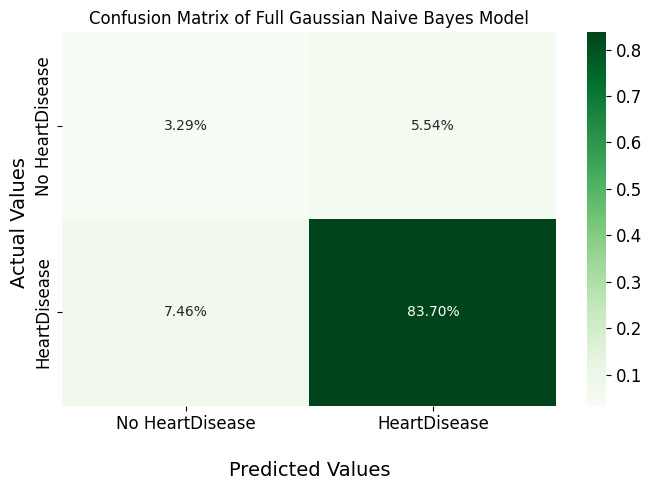

Saving figure ROC_Curve_of_Full_GaussianNB_Model


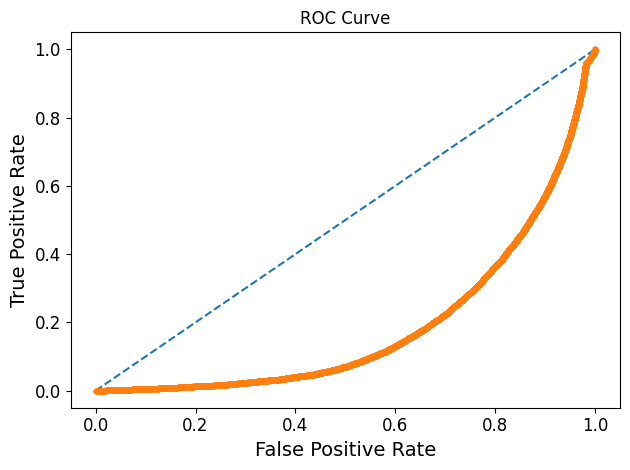

Saving figure Precision_Recall_Curve_of_Full_GaussianNB_Model


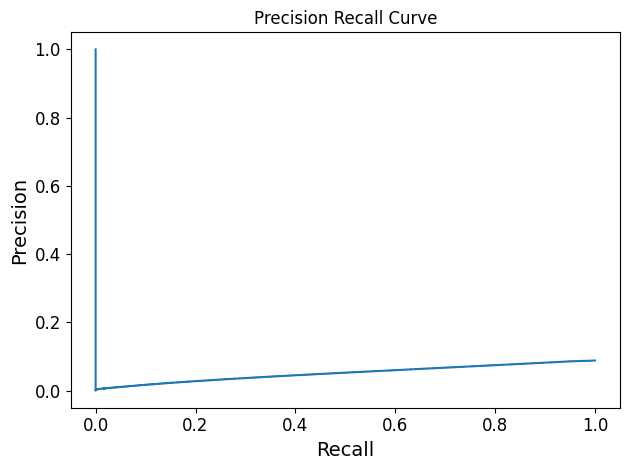

In [71]:
# Display GaussianNB Metrics
GaussianNB_PATH = os.path.join('gaussianNB')
def evaluate_FullGaussianNB():
    print("Full Gaussian Naive Bayes Metrics:\n")
    clf = full_gaussianNB_model
    y_pred = clf.predict(x_test)
    print(f"Number of Positive Predictions (Heart Disease): {np.sum(y_pred == 1)}\nNumber of Negative Predictions (No Heart Disease): {np.sum(y_pred == 2)}")
    cm = confusion_matrix(y_test, y_pred)

    # evaluate
    print(classification_report(y_test, y_pred))

    # print True and False Positive Rates

    # predict probabilities
    probs = clf.predict_proba(x_test)
    # keep probabilities for the positive outcome only
    probs = probs[:, 1]
    # calculate AUC
    auc = roc_auc_score(y_test, probs)

    print('AUC: %.3f' % auc)

    mae = mean_absolute_error(y_test, y_pred)
    print("Mean Absolute Error of the Full Gaussian Naive Bayes Model is", mae)

    # calculate roc curve
    fpr, tpr, thresholds = roc_curve(y_test, probs,
                                    pos_label=1)
    
    #print a couple of the True and False Positive Rates results
    print("False Positive Rate", fpr, "True Postitive Rate", tpr)

    # plot confusion matrix
    plt.figure(figsize=(7,5))
    ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Greens')
    # labels
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    ax.set_title('Confusion Matrix of Full Gaussian Naive Bayes Model')
    ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
    ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
    save_fig(GaussianNB_PATH,f"Confusion_Matrix_of_Full_GaussianNB_Model")
    plt.show()

    # plot ROC Curve
    plt.plot([0, 1], [0, 1], linestyle='--')

    # plot the roc curve for the model
    plt.plot(fpr, tpr, marker='.')
    # labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    # show the plot
    save_fig(GaussianNB_PATH,f"ROC_Curve_of_Full_GaussianNB_Model")
    plt.show()

    # Plot Precision Recall Display
    prec, recall, _ = precision_recall_curve(y_test, probs, pos_label=1)
    pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()
    # labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    # show the plot
    save_fig(GaussianNB_PATH,f"Precision_Recall_Curve_of_Full_GaussianNB_Model")
    plt.show()
    return fpr, tpr

fpr3, tpr3 = evaluate_FullGaussianNB()

### Display Decision Tree Metrics Using Reduced Feature

Reduced Decision Tree Metrics:

Number of Positive Predictions (Heart Disease): 283
Number of Negative Predictions (No Heart Disease): 105377
              precision    recall  f1-score   support

           1       0.61      0.02      0.04      9335
           2       0.91      1.00      0.95     96325

    accuracy                           0.91    105660
   macro avg       0.76      0.51      0.50    105660
weighted avg       0.89      0.91      0.87    105660

AUC: 0.801
Mean Absolute Error of the Reduced Decision Tree Model is 0.08773424190800681
False Positive Rate [0.00000000e+00 6.22891254e-05 3.63986504e-01 4.96184791e-01
 5.09057877e-01 6.38172852e-01 6.51980275e-01 6.66337919e-01
 7.26114716e-01 8.04318713e-01 8.19413444e-01 8.20669608e-01
 8.22797820e-01 8.58728264e-01 9.28502466e-01 9.35125876e-01
 9.39714508e-01 9.52608357e-01 9.71014794e-01 9.72686219e-01
 9.76475474e-01 9.78281858e-01 9.81323644e-01 9.81468985e-01
 9.81977680e-01 9.90106411e-01 9.91943940e-01 9.95286790

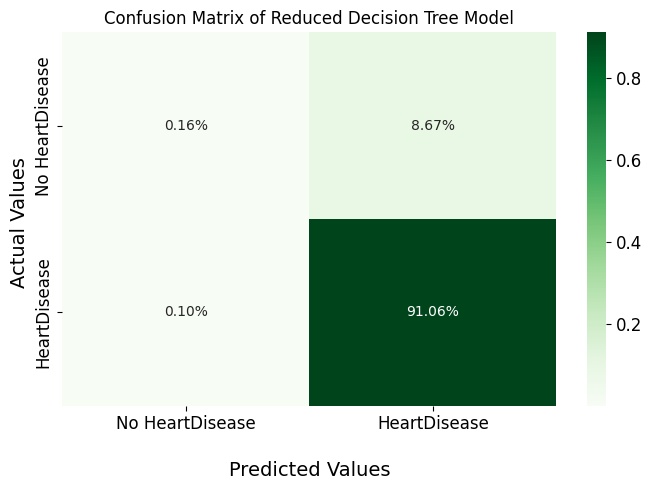

Saving figure ROC_Curve_of_Reduced_Decision_Tree_Model


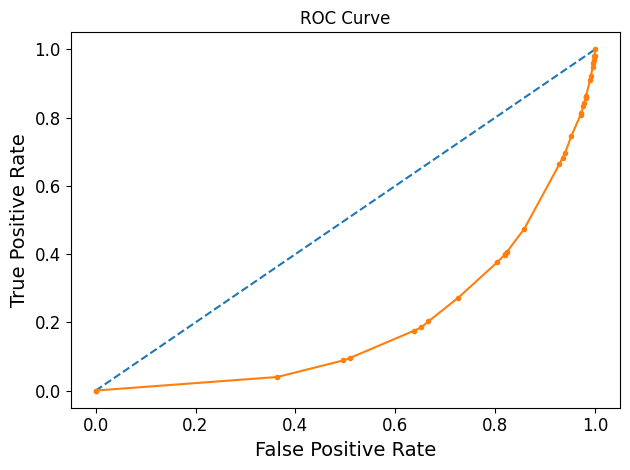

Saving figure Precision_Recall_Curve_of_Reduced_Decision_Tree_Model


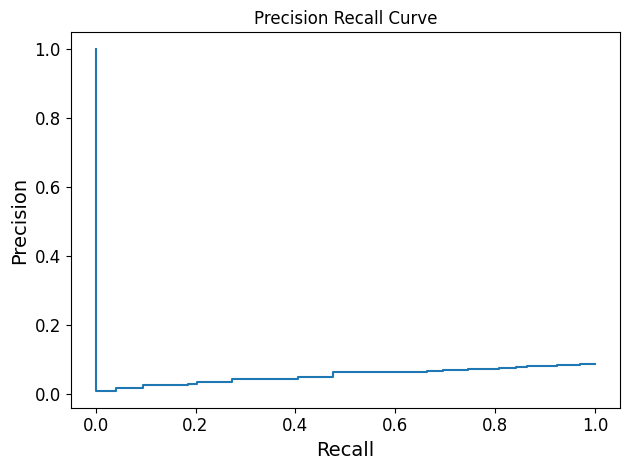

In [72]:
#Predict the response for test dataset

def evaluate_ReducedDecisionTree():
    print("Reduced Decision Tree Metrics:\n")
    reduced_dt = reduced_decisiontree_model
    y_pred = reduced_dt.predict(red_x_test)
    print(f"Number of Positive Predictions (Heart Disease): {np.sum(y_pred == 1)}\nNumber of Negative Predictions (No Heart Disease): {np.sum(y_pred == 2)}")
    cm = confusion_matrix(red_y_test, y_pred)

    # evaluate 
    print(classification_report(red_y_test, y_pred))

    # predict probabilities
    probs = reduced_dt.predict_proba(red_x_test)
    # keep probabilities for the positive outcome only
    probs = probs[:, 1]
    # calculate AUC
    auc = roc_auc_score(red_y_test, probs)

    print('AUC: %.3f' % auc)

    mae = mean_absolute_error(red_y_test, y_pred)
    print("Mean Absolute Error of the Reduced Decision Tree Model is", mae)

    # calculate roc curve
    fpr, tpr, thresholds = roc_curve(red_y_test, probs,
                                    pos_label=1)

    #print True and False Positive Rates 
    print("False Positive Rate", fpr, "True Postitive Rate", tpr)

    # plot confusion matrix
    plt.figure(figsize=(7,5))
    ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Greens')
    # labels
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    ax.set_title('Confusion Matrix of Reduced Decision Tree Model')
    ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
    ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
    save_fig(DECISION_TREE_PATH,f"Confusion_Matrix_of_Reduced_Decision_Tree_Model")
    plt.show()


    # plot ROC Curve
    plt.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    plt.plot(fpr, tpr, marker='.')
    # labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    # show the plot
    save_fig(DECISION_TREE_PATH,f"ROC_Curve_of_Reduced_Decision_Tree_Model")
    plt.show()

    # Plot Precision Recall Display
    prec, recall, _ = precision_recall_curve(red_y_test, probs, pos_label=1)
    pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()
    # labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    # show the plot
    save_fig(DECISION_TREE_PATH,f"Precision_Recall_Curve_of_Reduced_Decision_Tree_Model")
    plt.show()
    return fpr, tpr

fpr4, tpr4 = evaluate_ReducedDecisionTree()

### Display Gaussian Naive Bayes Metrics Using Reduced Feature

Reduced Gaussian Naive Bayes Metrics:

Number of Positive Predictions (Heart Disease): 9082
Number of Negative Predictions (No Heart Disease): 96578
              precision    recall  f1-score   support

           1       0.32      0.31      0.32      9335
           2       0.93      0.94      0.93     96325

    accuracy                           0.88    105660
   macro avg       0.63      0.63      0.63    105660
weighted avg       0.88      0.88      0.88    105660

AUC: 0.802
Mean Absolute Error of the Reduced Gaussian Naive Bayes model is 0.11878667423812228
False Positive Rate [0.00000000e+00 1.03815209e-05 4.77549961e-04 ... 9.99979237e-01
 1.00000000e+00 1.00000000e+00] True Postitive Rate [0.         0.         0.         ... 0.99989288 0.99989288 1.        ]
Saving figure Confusion_Matrix_of_Reduced_GaussianNB_Model


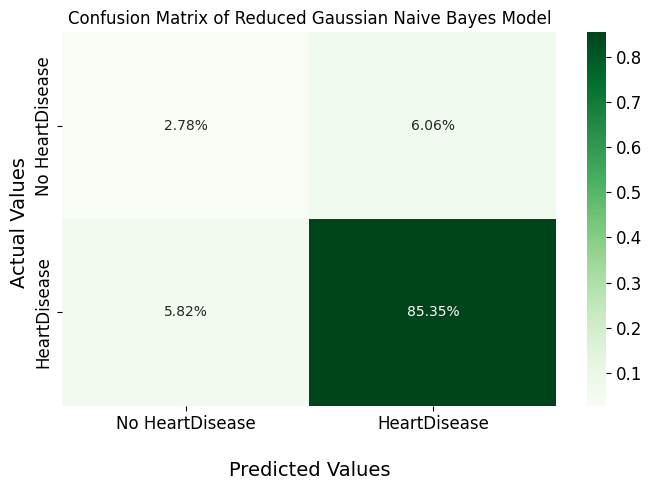

Saving figure ROC_Curve_of_Reduced_GaussianNB_Model


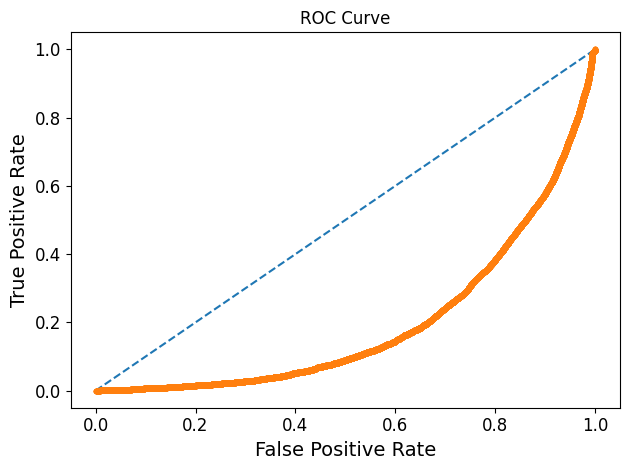

Saving figure Precision_Recall_Curve_of_Reduced_GaussianNB_Model


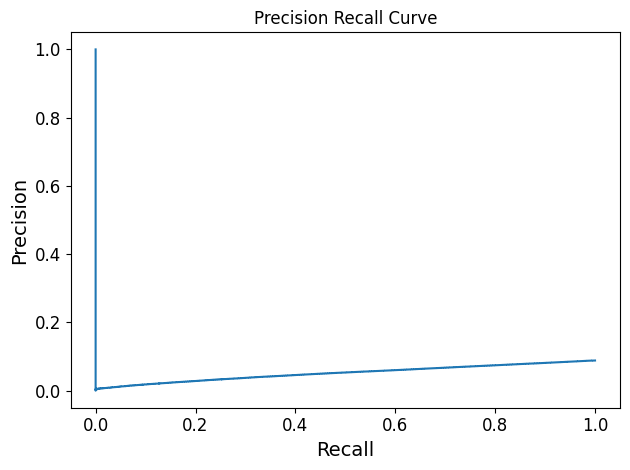

In [73]:
# Display Reduced Gaussian Naive Bayes Metrics

def evaluate_ReducedGaussianNB():
    print( "Reduced Gaussian Naive Bayes Metrics:\n")
    reduced_gaussianNB = reduced_gaussianNB_model
    y_pred = reduced_gaussianNB.predict(red_x_test)
    print(f"Number of Positive Predictions (Heart Disease): {np.sum(y_pred == 1)}\nNumber of Negative Predictions (No Heart Disease): {np.sum(y_pred == 2)}")
    cm = confusion_matrix(red_y_test, y_pred)

    # evaluate
    print(classification_report(red_y_test, y_pred))

    # predict probabilities
    probs = reduced_gaussianNB.predict_proba(red_x_test)
    # keep probabilities for the positive outcome only
    probs = probs[:, 1]
    # calculate AUC
    auc = roc_auc_score(y_test, probs)

    print('AUC: %.3f' % auc)

    mae = mean_absolute_error(red_y_test, y_pred)
    print("Mean Absolute Error of the Reduced Gaussian Naive Bayes model is", mae)

    # calculate roc curve
    fpr, tpr, thresholds = roc_curve(red_y_test, probs, pos_label=1)
    
    #print a couple of the True and False Positive Rates results
    print("False Positive Rate", fpr, "True Postitive Rate", tpr)

    # plot confusion matrix
    plt.figure(figsize=(7,5))
    ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Greens')
    # labels
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    ax.set_title('Confusion Matrix of Reduced Gaussian Naive Bayes Model')
    ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
    ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
    save_fig(GaussianNB_PATH,f"Confusion_Matrix_of_Reduced_GaussianNB_Model")
    plt.show()

    # plot ROC Curve
    plt.plot([0, 1], [0, 1], linestyle='--')

    # plot the roc curve for the model
    plt.plot(fpr, tpr, marker='.')
    # labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    # show the plot
    save_fig(GaussianNB_PATH, f"ROC_Curve_of_Reduced_GaussianNB_Model")
    plt.show()

    # Plot Precision Recall Display
    prec, recall, _ = precision_recall_curve(red_y_test, probs, pos_label=1)
    pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()
    # labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    # show the plot
    save_fig(GaussianNB_PATH, f"Precision_Recall_Curve_of_Reduced_GaussianNB_Model")
    plt.show()
    return fpr, tpr

fpr5, tpr5 = evaluate_ReducedGaussianNB()


### Display Random Forest Metrics Using Reduced Feature

Reduced Random Forest Metrics:

Number of Positive Predictions (Heart Disease): 4447
Number of Negative Predictions (No Heart Disease): 101213
              precision    recall  f1-score   support

           1       0.29      0.14      0.19      9335
           2       0.92      0.97      0.94     96325

    accuracy                           0.89    105660
   macro avg       0.60      0.55      0.57    105660
weighted avg       0.86      0.89      0.88    105660

AUC: 0.752
Mean Absolute Error of the KNN model is 0.10607609312890404
False Positive Rate [0.         0.462694   0.46271477 ... 0.99998962 0.99998962 1.        ] True Postitive Rate [0.         0.12544189 0.12544189 ... 0.99989288 1.         1.        ]
Saving figure Confusion_Matrix_of_Reduced_Random_Forest_Model


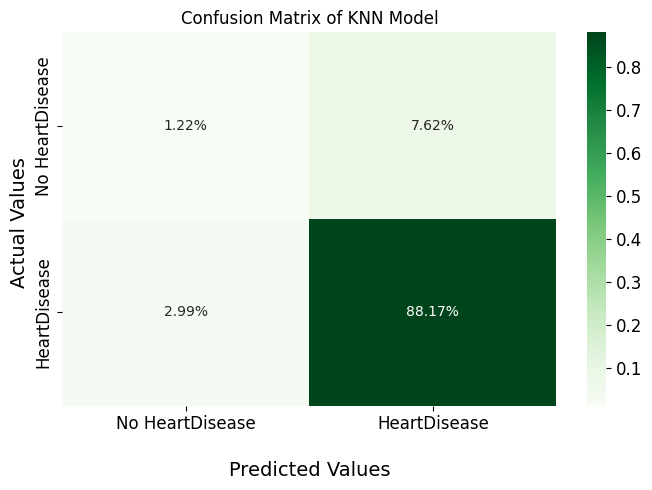

Saving figure ROC_Curve_of_Reduced_Random_Forest_Model


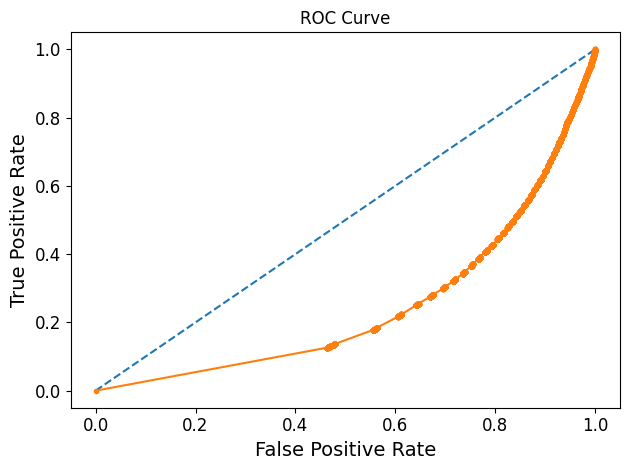

Saving figure Precision_Recall_Curve_of_Reduced_Random_Forest_Model


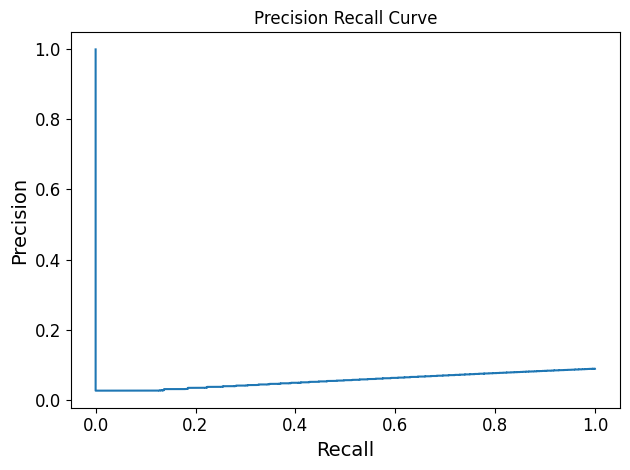

In [74]:
# Display Reduced Random Forest Metrics
RANDOMFOREST_PATH = os.path.join('randomforest')
def evaluate_ReducedRandomForest():
    print("Reduced Random Forest Metrics:\n")
    reduced_rf = reduced_randomforest_model
    y_pred = reduced_rf.predict(red_x_test)
    print(f"Number of Positive Predictions (Heart Disease): {np.sum(y_pred == 1)}\nNumber of Negative Predictions (No Heart Disease): {np.sum(y_pred == 2)}")
    cm = confusion_matrix(red_y_test, y_pred)

    # evaluate
    print(classification_report(red_y_test, y_pred))
    
    # predict probabilities
    probs = reduced_rf.predict_proba(red_x_test)
    # keep probabilities for the positive outcome only
    probs = probs[:, 1]
    # calculate AUC
    auc = roc_auc_score(red_y_test, probs)

    print('AUC: %.3f' % auc)

    mae = mean_absolute_error(red_y_test, y_pred)
    print("Mean Absolute Error of the KNN model is", mae)

    # calculate roc curve
    fpr, tpr, thresholds = roc_curve(red_y_test, probs,pos_label=1)
    
    #print a couple of the True and False Positive Rates results
    print("False Positive Rate", fpr, "True Postitive Rate", tpr)

    # plot confusion matrix
    plt.figure(figsize=(7,5))
    ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Greens')
    # labels
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    ax.set_title('Confusion Matrix of KNN Model')
    ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
    ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
    save_fig(RANDOMFOREST_PATH,f"Confusion_Matrix_of_Reduced_Random_Forest_Model")
    plt.show()

    # plot ROC Curve
    plt.plot([0, 1], [0, 1], linestyle='--')

    # plot the roc curve for the model
    plt.plot(fpr, tpr, marker='.')
    # labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    # show the plot
    save_fig(RANDOMFOREST_PATH,f"ROC_Curve_of_Reduced_Random_Forest_Model")
    plt.show()

    # Plot Precision Recall Display
    prec, recall, _ = precision_recall_curve(red_y_test, probs, pos_label=1)
    pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()
    # labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    # show the plot
    save_fig(RANDOMFOREST_PATH,f"Precision_Recall_Curve_of_Reduced_Random_Forest_Model")
    plt.show()
    return fpr, tpr

fpr6, tpr6 = evaluate_ReducedRandomForest()

Saving figure ROC_Curve_of_All_Models


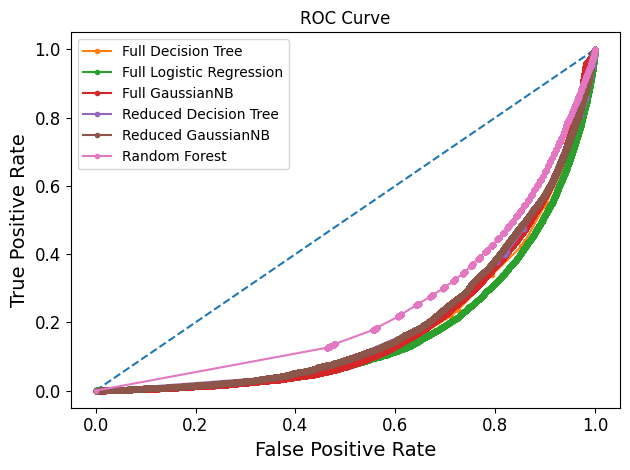

In [75]:
# ROC Curve with all models
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.', label='Full Decision Tree')
plt.plot(fpr1, tpr1, marker='.', label='Full Logistic Regression')
# plt.plot(fpr2, tpr2, marker='.', label='Full KNN')
plt.plot(fpr3, tpr3, marker='.', label='Full GaussianNB')
plt.plot(fpr4, tpr4, marker='.', label='Reduced Decision Tree')
plt.plot(fpr5, tpr5, marker='.', label='Reduced GaussianNB')
plt.plot(fpr6, tpr6, marker='.', label='Random Forest')


# labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
# show the plot
save_fig(
    'allmodels',
    "ROC_Curve_of_All_Models")
plt.show()
